In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
#ignore useless warnings (see Scipy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Projection methods

In [2]:
# Let's build the 3D dataset to play around with:

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


# PCA using SVD decomposition

In [3]:
# Principal Components Analysis is the most popular form of dimensionality reduction. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.
# Before you project the training set onto a lower-dimensional hyperplane, you need to choose the right hyperplane.
# You want to select the axis that preserves the maximum amount of variance sa it will lose less info then aother projections.
# Another way to justify the axis is that it minimizes the mean square distance between the original dataset and its projection onto the axis. This is the idea behind PCA.



In [4]:
# So we are trying to find the axis that when projected onto maintains the highest variance. The unit vector for this axis is called the Principal Component.
# So how do you find the principal components of a training set? USing Singular Value Decomposition. One of the three matrices, V contains all the principal components.

# The following Python code uses Numpy's svd() function to obtain all the principal components of the training set, then extracts the first two PCs:
X_centered = X - X .mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:

m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [6]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [7]:
# Now we use the following code to project the training set onto the plane defined by the first two principle components:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [8]:
X2D_using_svd = X2D

# PCA using Scikit-Learn

In [9]:
# Scikit-Learn's PCS class implements Principal Component Analysis usng Singular Value Decomposition.
# The following code applies PCA to reduce the dimensionality of the dataset down to 2 dimensions(note that it automatically takes care of the centering process)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [10]:
# After fitting the PCA transformer to the dataset, you can access the principal components  using components_variable (note it contains the PCs as horizontal vectors)

In [11]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [12]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [13]:
# Notice that running PCA multiple times on slightly different datasets may result in different results. In this example, PCS using Scikit-Learn gives the same projection as the one given in the SVD approach, except both axes are flipped:

np.allclose(X2D, -X2D_using_svd)

# What the fuck... Why is this false?

True

In [14]:
# Recover the 3D points projected on the plane(PCA 2D subspace)

X3D_inv = pca.inverse_transform(X2D)

In [15]:
# Of course there is some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

np.allclose(X3D_inv, X)

False

In [16]:
# We can compute the reconstruction error:

np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

In [17]:
# The inverse transform in the SVD approach looks like this:

X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [18]:
# The reconstructions from both methods are not identical because Scikit-Learn's Principal Components Analysis class automatically takes care of reversinng the mean centering, but if we subtract the mean, we get the same reconstruction:

np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [19]:
# The PCS object gives access to the principalcomponents that it computed:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [20]:
# Compare to the first two principal components computed using the SVD method:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

# Explained Variance Ratio

In [21]:
# Another very useful piece of information is the explained variance ratio of each principal component, available via the explained_variance_ratio_ variable.
# It indicates the proportion of the dataset's variance that lies along the axis of each principle component.

# For example, let's look at the explained variance ratios of the first two components of the 3D dataset represented in Fig 8-2:

pca.explained_variance_ratio_
# The output of the above code says that 84.2% of the dataset's variance lies along the first axis and 14.6% lies along the second axis.


array([0.84248607, 0.14631839])

In [22]:
# By projecting down to 2D, we lost about 1.1% of the variance:

1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

In [23]:
# Here is how to compute the explained variance ratio using the SV approach (recall that s is the diagonal of the matrix S):

np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

In [24]:
# The following code in the next few blocks will display a plot of 3D data and how it can be dimensionally reduced to a 2D plane:

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs
        
    def draw(self, renderer):
        xs3d, ys3d, zs3d =  self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]), (xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [25]:
# Now express the plane as a function of x and y:

axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0,2] * x1 + R[1,2] * x2) / (1 - R[2,2])

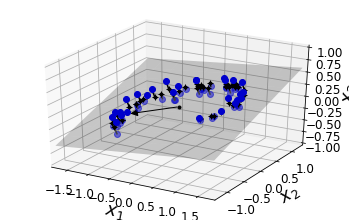

In [26]:
# Plot the 3D dataset, the plane, and the projections on that plane:

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0,0]],[0, C[0, 1]], [0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
        
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.savefig("dataset_3d_plot")
plt.show()
    


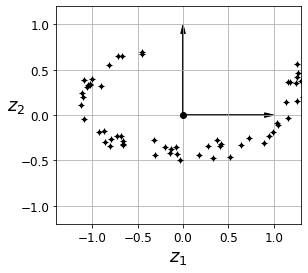

In [27]:
# The following code shows the 2D projection of the 3D data:

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.4, 1.3, -1.2, 1.2])
ax.grid(True)
plt.savefig("dataset_2d_plot")

# Manifold Learning

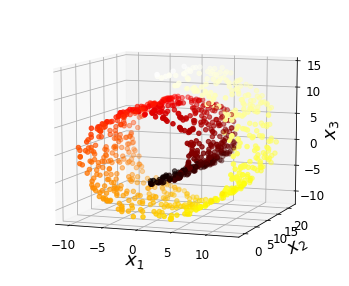

In [28]:
# The swiss roll dataset that will soon be displayed is an example of a 2D manifold. A 2D manifold is a 2D shape that can be bent and twisted in a higher dimensional space.
# Manifold learning is where dimensionality reduction algorithms work by modeling the manifold on which training instances lie. It relies on the assumption that most real-world high-dimensional datasets lie close to a much lower dimensional manifold.
# This assumption has been empirically observed....

# The code below summons the swiss roll dataset:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.savefig("swiss_roll_plot")
plt.show()

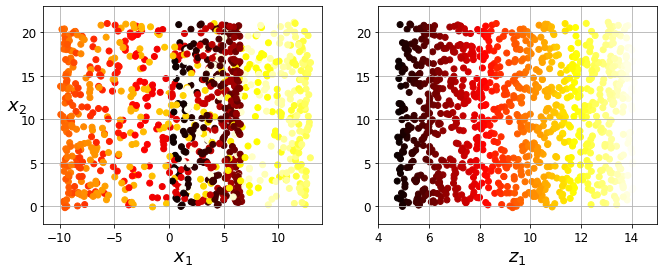

In [29]:
# The following code shows what would happen if you simply projected the 3d dataset onto a 2D plane.... Alot of the data would be lost. What you really want is to unroll the data as shown in the other plot shown:

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.savefig("squished_swiss_roll_plot")
plt.show()

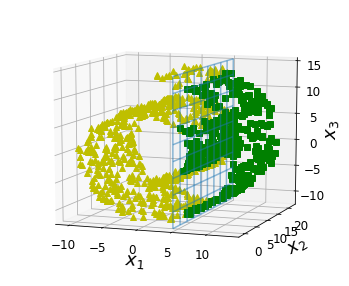

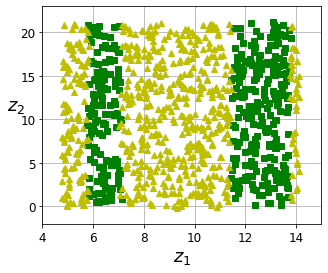

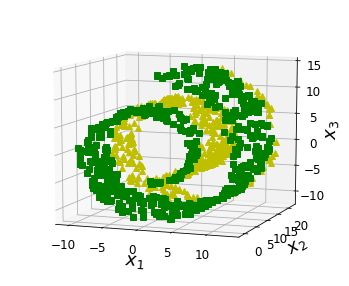

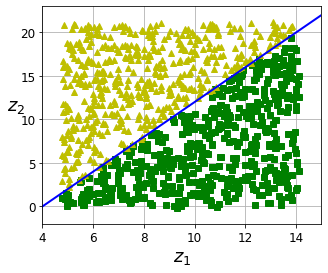

In [30]:
# Manifold learning comes with the assumption that the task at hand(eg. classification or regression) will be simpler if expressed in a lower dimension.
# However this isn't always the case. Sometimes reducing to a lower dimension will complicate classification.
# The code below displays an example of this:

from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.savefig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.savefig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.savefig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4,15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.savefig("manifold_decision_boundary_plot4")
plt.show()


# PCA

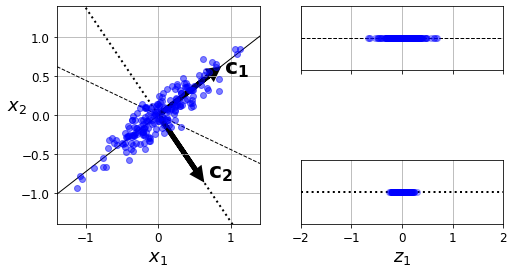

In [31]:
# Principal Component Analysis is the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data and then it projects data on that hyperplane.

# Before you can project the training set onto a lower-dimensional hyperplane, you need to chose the right hyperplane.
# The code below displays how a simple 2D dataset is projected down onto a one dimensional line. The plots are projectiona on three different axes.
# As you can see, the projection onto the solid line preserves the maximum variance:

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0,1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8, 4))
plt.subplot2grid((3,2), (0,0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0,1))
plt.plot([-2,2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (0,1))
plt.plot([-2,2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:,0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2,1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.savefig("pca_best_projection")
plt.show()

# Choosing the Right Number of Dimensions

In [32]:
# Instead of arbitrarily choosing the number of dimensions to reduce down to, it is preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g 95%).
# This is unless you are reducing dimensionality for visualization- in this case 2 or 3 dimensions should be the goal.

# The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set's variance:



# MNIST compression

In [33]:
# After dimensionality reduction, the training set takes up much less space.
# For example, applying PCA to the MNIST dataset while preserving 95% of its variance. You will find that each instance will have just over 150 features instead of the original 784 features.
# MNIST Dimensionality reduction to 95% variance decreases the dataset size to 20% of its original size.

# It is also possible to decompress the reduced MNIST dataset back to 784 dimensions by applying the inverse transfrom of the PCA projection.

from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [34]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [36]:
d

154

In [37]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [38]:
pca.n_components_

154

In [39]:
np.sum(pca.explained_variance_ratio_)

0.9504334914295707

In [40]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [41]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")



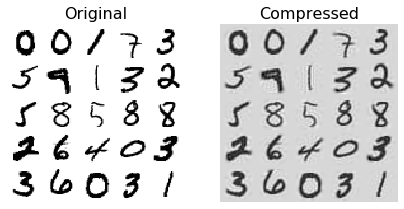

In [42]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

plt.savefig("mnist_compression_plot")



In [43]:
X_reduced_pca = X_reduced

# Incremental PCA

In [44]:
# One problem with the preceding implementation of PCA is that it requires the whole training set to fit in memory in order for the Support Vector Decomposition (SVD) algorithm to run.
# Fortunately, with the Incremental PCS algorithms, you can split the training into mini-batches and feed the IPCA algorithm into mini-batches and feed the IPCA algorithm one batch at a time.
# This is useful for large training sets, and also to apply PCA online (on the fly, as new instances arrive).

# The following code splits the MNIST dataset into 100 minibatches (using Numpy's array_split() function) and feeds them to Scikit-Learn's icrementalPCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.
# Note that you must call the partial_fit() method with each mini-batch rather than the fit() method with the whole training set:

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in book
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [45]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

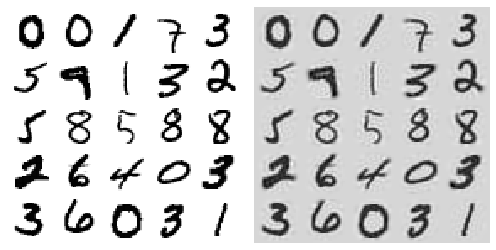

In [46]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [47]:
X_reduced_inc_pca =X_reduced

In [48]:
# Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal:

np.allclose(pca.mean_, inc_pca.mean_)

True

In [49]:
# But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect:

np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

In [50]:
# Alternatively, we can use NumPy's memmap class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it.
# Since the IncrementalPCA class uses only a small part of the array at any given time, the memory usage remains under control.

# Let's create the mmap() structure and copy the MNIST data into it. This would typically be done by a first program:

filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [51]:
# Now deleting the memmap() object will trigger its Python finalizer, which ensures that the data is saved to disk.

del X_mm

In [52]:
# Next, another program would load the data and use it for training:

X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [53]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

# Randomized PCA

In [54]:
# Scikit-Learn offers another option to perform PCA, called Randomized PCA.
# This is a stochastic(randomly determined) algorithm that quickly finds an approximation of the first d principal components. 
# 
# It is much faster than previous PCA algorithms when d is much smaller than n(number of instances)

rnd_pca = PCA(n_components=154, svd_solver="randomized")

# Time Complexity

In [55]:
# Let's time regular PCA against Incremental PCA and Randomized PCA, for various numbers of principal components:

import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")
    
for pca in (regular_pca, inc_pca, rnd_pca):
    t1 = time.time()
    pca.fit(X_train)
    t2 = time.time()
    print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
n_components = 10
n_components = 154
    PCA: 4.3 seconds
    IncrementalPCA: 21.7 seconds
    PCA: 4.3 seconds


Text(0.5, 1.0, 'PCA and Randomized PCA time complexity')

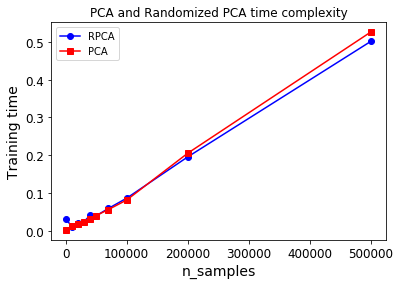

In [56]:
# Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)
    
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity")

# As you can see in the plot, there is a slight difference in training time efficiency between Randomized and Conventional PCA as the number of samples increases past 200K.

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

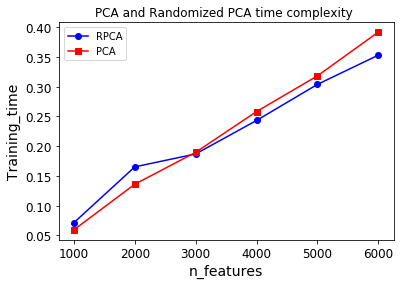

In [57]:
# Now let's see the difference between the performance on datasets of 2,000 instances with various numbers of features:

times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)
    
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training_time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

# Kernel PCA

In [58]:
# In Chapter 5 we discussed the Kernel Trick, a mathematical technique that implicitly maps instances into a very high-dimensional space(called feature space), enabling nonlinear classification and regression with Support Vector Machines.
# The same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction.
    # It is good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

# As a reminder, the Kernel Trick allows you to add a large number of features that can handle a complex dataset without incurring the huge computational cost of all those features.

# The following code uses Scikit-Learn's KernelPCA class to perform kPCA with and RBF kernel (See Ch 5 for what an RBF kernel is).
# The plots generated shows the Swiss Roll, reduced to two dimensions using a linear kernel, an RBF kernel, and a Sigmoid(Logistic) Kernel:


In [59]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [60]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)


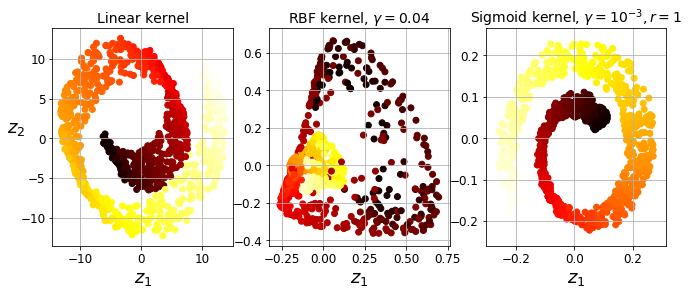

In [61]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11,4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"),
(132, rbf_pca, "RBF kernel, $\gamma=0.04$"), 
(133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
        
    plt.subplot(subplot)
    #plt.subplot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.savefig("kernel_pca_plot")
plt.show()
        
    
    

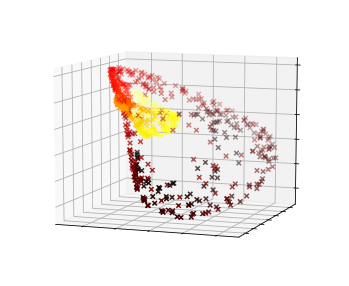

In [62]:
# The following code displays a plot of the Swiss Roll dataset before the different PCA kernels were implemented:

plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot,
marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.savefig("preimage_plot", tight_layout=False)
plt.show()

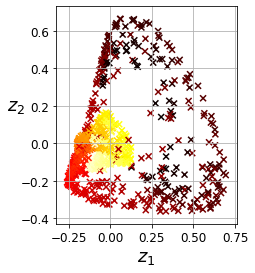

In [63]:
# The following code shows a flipped projection of the previous swiss roll dataset:

X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

# Selecting a Kernel and Tuning Hyperparameters

In [64]:
# As Kernel PCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values.
# However, dimensionality reduction is often a preparation step for a supervised learning task, so you can simply use grid search to select the kernel and hyperparameters that lead to the best performance on that task.

# The following code creates a two-step pipeline: 
    # first reducing dimensionality to 2D using kPCA
    # then applying Logistic Regression for classification.
    
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="liblinear"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [65]:
# The kernel and hyperparameters are then available through the best_params_ variable:

print(grid_search.best_params_)

# Gamma= 0.0433. What is gamma?
# Kernel PCA = RBF. What does RBF stand for?

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [66]:
# Another approach, this time entirely unsupervised, is to select the kernel and hyperparameters that yield the lowest reconstruction error.
# Reconstruction error is the measurement of the difference between the original values in the dataset, and the values that are reconstructed back into a higher dimension from the projected dataset.

# So how do we perform reconstruction? When method shown in the code below is to train a supervised regression model, with the projected instances as the training set and the original instances as the target.
# Scikit-Learn will do this automatically if you set fit_inverse_transform=True, sd shown below:

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)


# Gamma is the hyperparameter that controls each instances' range of influence on the learning algorithm. The larger the gamma, the less influence each instance has, and the smaller the gamma, the more influence it has. A smaller gamma will create a smooth decision boundary for classification.
# A larger Gamma will create a more jagged and irregular decision boundary

In [67]:
# Now we can compute the reconstruction pre-image error:

from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

# Pre-image is a plot of points in the original dataspace that are close to the reconstructed point. This preimage is constructed by projecting the dimensionally reduced instances onto a 3D plane.
# The Preimage error is the squared distance between the Pre-image and an Instance in the Original Space.

32.78630879576617

In [68]:
# Now that we have calculated the reconstruction pre-image error, we can use Grid Search with Cross-Validation to find the kernel and hyperparameters that minimize this reconstruction error. 

# LLE (Locally Linear Embedding)

In [69]:
# LLE is another very powerful nonlinear dimensionality reduction technique.
# It is a Manifold Learning technique that doesn't rely on projections like the previous algorithms
# It works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low dimensional representation where these local linear relationships are preserved.
# This makes LLE great at unrolling twisted manifold datasets, especially when there isn't too much noise.

# The following code creates a Swiss Roll Dataset and unrolls it using LLE:

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [70]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

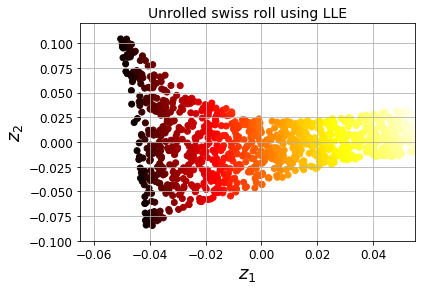

In [71]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.savefig("lle_unrolling_plot")
plt.show()

In [72]:
# Here's how LLE works: first, for each training instance x^(i), the algorithm identifies its k closest neighbors (in the preceding code k=10), then tries to reconstruct x^(i) as a linear function of these neighbors.
# More specifically, it finds the weights on the parameters such that the squared distance between the training instance and its neighbors ar as small as possible.
# All the weights for the particular instance and all other instances are compiled into a weight matrix, W. T
# The weight matrix W then encodes the local linear relationships between the training instances.
# The next step is to map the training instances into a d-dimensional space while preserving these local relationships as much as possible.

# Other Dimensionality Reduction Techniques: MDS, Isomap and t-SNE

In [73]:
# There are many other dimensionality reduction techniques available in Scikit-Learn. Here are some of the most popular:

# Multidimensional Scaling(MDS): reduces dimensionality while trying to preserve the distances between instances.

# Isomap: creates a graph by conecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances.

# t-Distributed Stochastic Neighbor Embedding (t-SNE): reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.

# Linear Discriminant Analysis(LDA): is a classification algorithm , but during training it learns the most discriminative axes between the classes, and these axes can be used to define a hyperplane on which to project the data.
    # The benefit is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM Classifier.
    


In [74]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds=mds.fit_transform(X)

In [75]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

/home/lam/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

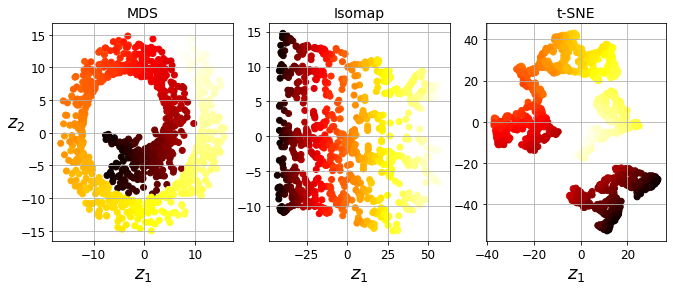

In [81]:
# The following code displays plots showing how the different dimensionality reduction techniques change the Swiss Roll Dataset:

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                    (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    
plt.savefig("other_dim_reduction_plot")
plt.show()